In [1]:
from main import *
from utils import load_session
from preprocess import resize_and_pad

In [2]:
class CFG:
    image_size = IMAGE_SIZE
    conf_thres = 0.01
    iou_thres = 0.1

cfg = CFG()

In [3]:
session = load_session(PATH_MODEL)

In [4]:
session.get_providers()

['CPUExecutionProvider']

In [5]:
from PIL import Image, ImageDraw

In [11]:
image_cv = cv2.imread("sample/1.jpg")
image_cv

array([[[63, 56, 57],
        [50, 43, 44],
        [53, 45, 47],
        ...,
        [75, 70, 71],
        [79, 74, 75],
        [88, 83, 84]],

       [[61, 54, 55],
        [47, 40, 41],
        [49, 42, 43],
        ...,
        [76, 71, 72],
        [80, 75, 76],
        [88, 83, 84]],

       [[61, 54, 55],
        [47, 40, 41],
        [47, 40, 41],
        ...,
        [82, 75, 76],
        [83, 76, 77],
        [90, 83, 84]],

       ...,

       [[79, 59, 56],
        [67, 48, 44],
        [69, 50, 46],
        ...,
        [66, 55, 54],
        [66, 55, 54],
        [78, 66, 66]],

       [[80, 61, 57],
        [68, 49, 45],
        [71, 51, 48],
        ...,
        [65, 54, 53],
        [65, 54, 53],
        [76, 65, 65]],

       [[80, 61, 57],
        [68, 49, 45],
        [71, 51, 48],
        ...,
        [65, 54, 53],
        [65, 54, 53],
        [76, 65, 65]]], dtype=uint8)

In [7]:
image, ratio, (padd_left, padd_top) = resize_and_pad(image_cv, new_shape=cfg.image_size)
img_norm = normalization_input(image)

In [8]:
pred = infer(session, img_norm)
pred = postprocess(pred)[0]

In [9]:
paddings = np.array([padd_left, padd_top, padd_left, padd_top])
pred[:,:4] = (pred[:,:4] - paddings) / ratio

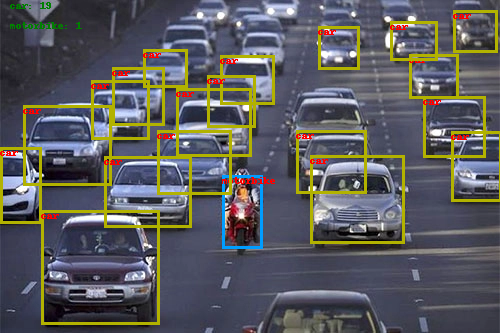

In [10]:
image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
image = Image.fromarray(image_cv)
visualize(image, pred)